In [1]:
#!pip install selenium

In [2]:
import requests
import requests_cache
from bs4 import BeautifulSoup
import time
import pandas as pd
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from requests_html import HTML
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Thu thập dữ liệu

In [ ]:
#Yesterday
#world = "/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[1]"
#europe ="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[2]"
#north_america="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[3]"
#asia="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[4]"
#south_america="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[5]"
#africa="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[6]"
#oceania="/html/body/div[3]/div[3]/div/div[6]/div[2]/div/div/div[2]/div/nav/ul/li[7]"
#2 Days Ago
world = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[1]/a"
europe = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[2]/a"
north_america = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[3]/a"
asia = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[4]/a"
south_america = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[5]/a"
africa = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[6]/a"
oceania = "/html/body/div[3]/div[3]/div/div[6]/div[3]/div/div/div[2]/div/nav/ul/li[7]/a"
def get_source(continent):
    table=[]
    options = Options()
    options.add_argument("start-maximized")
    
    browser = webdriver.Chrome()
    
    url = "https://www.worldometers.info/coronavirus/"
     
    # Opening the website
    browser.get(url)
    
    #maximize window size
    browser.maximize_window()
    
    #scroll down page by pixel
    browser.execute_script('window.scrollBy(0,18000)','')
    

    button = browser.find_element_by_link_text("2 Days Ago")
    button.click()
    
    button1 = browser.find_element_by_xpath(continent)
    button1.click()
   
    html = browser.page_source
    browser.close()
    return html

Hàm `get_source` trả về source html của trang web

-`continent`: là một chuỗi xpath của các tab như `All/Europe/North America/Asia/South America/Africa/Oceania`
    
-`get_source`: sử dụng thư viện selenium để mở rộng cửa sổ web, cuộn trang web, nhấn tab `Yesterday` và nhấn các tab như `All/Europe/North America/Asia/South America/Africa/Oceania`

In [ ]:
def write_file(continent,file_name):
    html = get_source(continent)
    CountryList = pd.read_html(html)
    df=CountryList[1]
    df.to_csv(file_name,sep = '\t', index=False)

Hàm `write_file` trả về 1 file csv chứa tình hình diễn biến dịch Covid 19 ở các quốc gia hoặc vùng lãnh thổ trên Thế giới

-`continent`: là một chuỗi xpath của các tab như `All/Europe/North America/Asia/South America/Africa/Oceania`

-`file_name`: tên của file cần lưu

-`write_file`: sử dụng source html từ hàm `get_source` và hàm `read_html` của `pandas` để lấy được bảng thống kê tình hình diễn biến dịch Covid 19 ở các quốc gia hoặc vùng lãnh thổ trên Thế giới dưới dạng dataframe. Ta chuyển dataframe thành csv file bằng hàm `to_csv` của pandas

VD: `write_file(world,'All_07122021.csv')`

In [ ]:
write_file(world,'all_12032022.csv')
write_file(europe,'europe_12032022.csv')
write_file(north_america,'north_america_12032022.csv')
write_file(asia,'asia_12032022.csv')
write_file(south_america,'south_america_12032022.csv')
write_file(africa,'africa_12032022.csv')
write_file(oceania,'oceania_12032022.csv')

# Ý nghĩa dữ liệu

`Country, Other`: Quốc gia hoặc các châu lục

`Total Cases`: Tổng số ca nhiễm Covid 19 được phát hiện tính tới ngày thu thập

`New Cases`: Số ca nhiễm mới được ghi nhận trong ngày

`Total Deaths`: Tổng số ca tử vong tích lũy trong số các trường hợp được phát hiện tính tới ngày thu thập

`New Deaths`: Số ca tử vong được ghi nhận trong ngày

`Total Recovered`: Tổng số ca hồi phục tích lũy trong số các trường hợp được phát hiện tính tới ngày thu thập

`New Recoverd`: Số ca hồi phục được ghi nhận trong ngày

`Active Cases`: Số ca đang được điều trị. `Active Cases` = `Total Cases` - `Total Deaths` - `Total Recoverd`

`Serious, Critical`: Số ca nhiễm nghiêm trọng hoặc trở nặng tích lũy trong số các trường hợp được phát hiện tính tới ngày thu thập

`TotCases/1M pop`: Tỉ lệ người nhiễm Covid 19 so với dân số quốc gia. `TotCases/1M pop` = (`Total Cases` / `Popular`) * `1000`

`Deaths/1M pop`: Tỉ lệ người tử vong do Covid 19 so với dân số quốc gia. `Deaths/1M pop` = (`Total Deaths` / `Popular`) * `1000`

`Total Tests`: Tổng số ca nghi nhiễm Covid 19 tích lũy trong số các trường hợp được phát hiện tính tới ngày thu thập

`Tests/1M pop`: Tỉ lệ các ca nghi nhiễm Covid 19 so với dân số quốc gia. `Tests/1M pop` = (`Total Tests` / `Popular`) * `1000`

`Population`: Dân số của một quốc gia

# Tiền xử lý dữ liệu

In [3]:
def fixing(cell):
    if(not isinstance(cell,str) and math.isnan(cell)):
        return np.nan
    else:
        try:
            cell = ''.join(char for char in cell if char.isalnum())
        except:
            return cell
    return cell

Trong một số trường dữ liệu, ta nhận được các giá trị có dạng như `+11,052`. Điều này sẽ làm cho dữ liệu của trường đó có dạng `object` và gây khó khăn trong việc trực quan hóa dữ liệu hoặc học máy

Hàm `fixing` nhận vào 1 giá trị trong 1 trường dữ liệu nào đó (`cell`) và trả về giá trị hợp lệ, thuận tiện cho việc chuyển kiểu dữ liệu từ `object` thành `float64`. Ta sử dụng hàm `join` dùng để cắt bỏ các dấu `+` và `,`. Hàm này không xử lý các giá trị NaN 

In [4]:
def change_data_type(change_file):
    df = pd.read_csv(change_file,sep='\t',index_col=0)
    
    df['NewCases']=df['NewCases'].apply(fixing)
    df['NewCases']=df['NewCases'].astype(float)
    
    df['NewDeaths']=df['NewDeaths'].apply(fixing)
    df['NewDeaths']=df['NewDeaths'].astype(float)
    
    df['NewRecovered']=df['NewRecovered'].apply(fixing)
    df['NewRecovered']=df['NewRecovered'].astype(float)
    
    df.to_csv(change_file,sep='\t', header=True)

Các giá trị không hợp lệ ta nhận được từ tập dữ liệu được phân bố ở các cột `NewCases`, `NewDeaths`, `NewRecovered`.

Hàm `change_data_type` nhận vào tên 1 file csv (`change_file`) cần chuyển đổi kiểu dữ liệu. Ta đọc file csv này và chuyển thành kiểu dataframe. Từ đó ta sử dụng hàm `apply` và `astype` của pandas để sửa lỗi và chuyển kiểu dữ liệu của giá trị đó

# Trực quan hóa dữ liệu

In [5]:
def total_world_and_continents_file(list_files,file_name,date):
    total =[]
    with open(list_files[0],mode='r') as myfile:
        lines = myfile.readlines()
        total.append('Date'+lines[0][1:])
        total.append(date + '\t' +lines[1][1:])
    for file in list_files[1:]:
        with open(file,mode='r') as myfile:
            lines = myfile.readlines()
            total.append(date + '\t' +lines[1][1:])
        
    with open(file_name,mode='w') as myfile:
        for row in total:
            myfile.writelines(row)

Hàm `total_world_and_continents_file` trả về 1 file csv tập hợp các hàng total của các tập dữ liệu All và các châu lục

-`list_files`: 1 list tên các tên file csv của các tập dữ liệu All và các châu lục trong cùng 1 ngày

-`file_name`: tên file csv 

-`date`: là chuỗi thể hiện ngày tương ứng với các tập dữ liệu All và các châu lục

VD: `list_files=['All_07122021.csv',
            'europe_07122021.csv',
            'north_america_07122021.csv',
            'asia_07122021.csv',
            'south_america_07122021.csv',
            'africa_07122021.csv',
            'oceania_07122021.csv',]`
            
`total_world_and_continents_file(list_files,'total_07122021.csv','20211207')`

In [6]:
def compare_world_and_continents(field):
    df1 = pd.read_csv('total_01122021.csv',sep='\t')
    df2 = pd.read_csv('total_02122021.csv',sep='\t')
    df3 = pd.read_csv('total_03122021.csv',sep='\t')
    df4 = pd.read_csv('total_04122021.csv',sep='\t')
    df5 = pd.read_csv('total_05122021.csv',sep='\t')
    df6 = pd.read_csv('total_06122021.csv',sep='\t')
    df7 = pd.read_csv('total_07122021.csv',sep='\t')
    concatenated = pd.concat([df1,df2,df3,df4,df5,df6,df7])
    concatenated['Date'] = pd.to_datetime(concatenated['Date'].astype(str), format='%Y%m%d')
    
    plt.figure(figsize = (16,9))
    sns.set(style='darkgrid',)
     
    # Draw line plot of Date and field with parameters and hue "Country,Other"
    sns.lineplot(x = 'Date', y = field, data = concatenated, hue = 'Country,Other',
         dashes = False,markers = 'o-',  legend="brief",)
     
    plt.title('Line Plot of '+field, fontsize = 20)
    plt.xlabel("Date", fontsize = 15)
    plt.ylabel(field, fontsize = 15)
    
    
    plt.show()

compare_world_and_continents('TotalCases')
compare_world_and_continents('TotalDeaths')
compare_world_and_continents('TotalRecovered')

KeyError: 'Date'

Hàm `compare_world_and_continents` sử dụng biểu đồ đường `line chart` để so sánh số liệu giữa thể giới với các châu lục và giữa các châu lục với nhau về một trường dữ liệu nào đó (`field`)


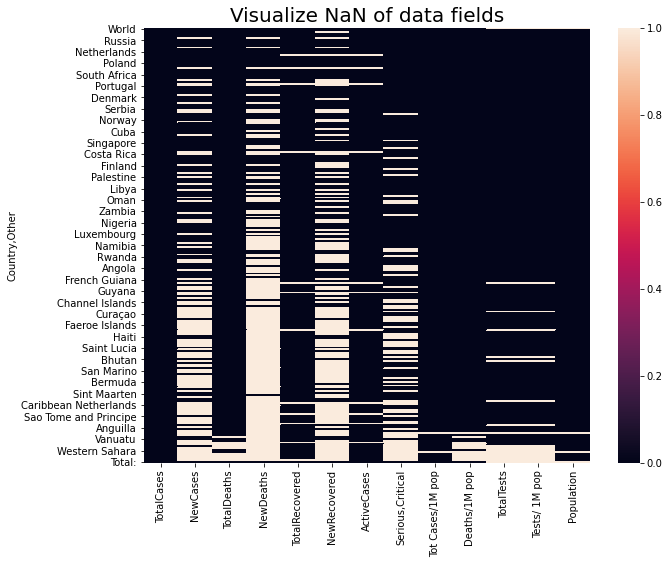

In [7]:
def visual_NaN():
    df = pd.read_csv('all_12032022.csv',sep='\t',index_col=1)
    df=df.iloc[:,1:]
    plt.figure(figsize=(10,8))
    sns.heatmap(df.isna())
    plt.title('Visualize NaN of data fields', fontsize = 20)
    plt.show()

#Biểu đồ trực quan giá trị NaN của các quốc gia trên Thế giới vào ngày thu thập cần nhất
visual_NaN()

Hàm `visual_NaN()` sử dụng bản đồ nhiệt `heatmap` để trực quan hóa các giá trị `NaN` của tập dữ liệu All của ngày thu thập gần nhất, cụ thể là ngày 07/12/2021 

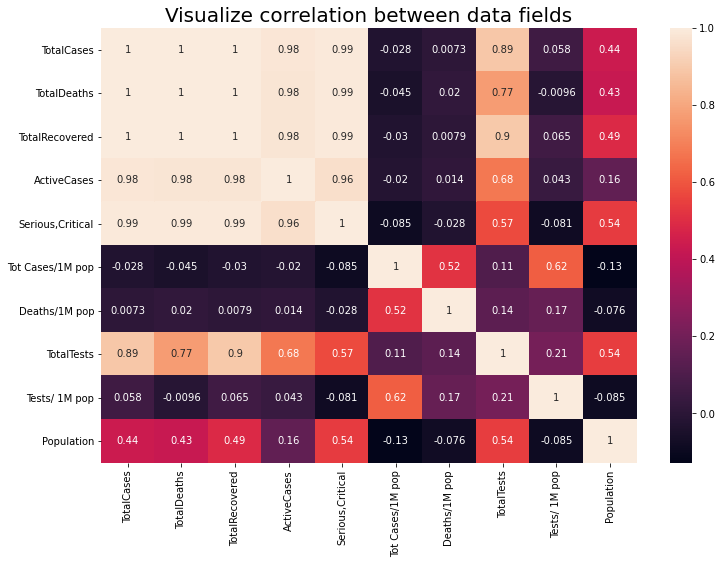

In [8]:
#Xet su tuong quan
def visual_correlation():
    df = pd.read_csv('all_12032022.csv',sep='\t',index_col=0)
    corr = df.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(data=corr,annot=True)
    plt.title('Visualize correlation between data fields', fontsize = 20)
    plt.show()
visual_correlation()

Hàm `visual_correlation()` sử dụng bản đồ nhiệt `heatmap` để trực quan hóa sự tương quan giữa các trường dữ liệu trong tập dữ liệu All của ngày thu thập gần nhất, cụ thể là ngày 07/12/2021 

In [ ]:
def compare_continents(field):
    df = pd.read_csv('total_07122021.csv',sep='\t')
    
    labels = df['Country,Other'].iloc[1:]
    sizes = df[field].iloc[1:]
    explode = [0, 0, 0, 0,0,0.2]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','red']
    
    fig,ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes, labels=labels,explode = explode,colors=colors, autopct='%.1f%%',
           textprops={'size': 'x-large'})
    ax.set_title(field, fontsize=18)
    plt.show()
    
compare_continents('TotalCases')
compare_continents('TotalDeaths')
compare_continents('TotalRecovered')

Hàm `compare_continents` sử dụng biểu đồ tròn `pie chart` để so sánh số liệu giữa các châu lục về 1 trường dữ liệu nào đó

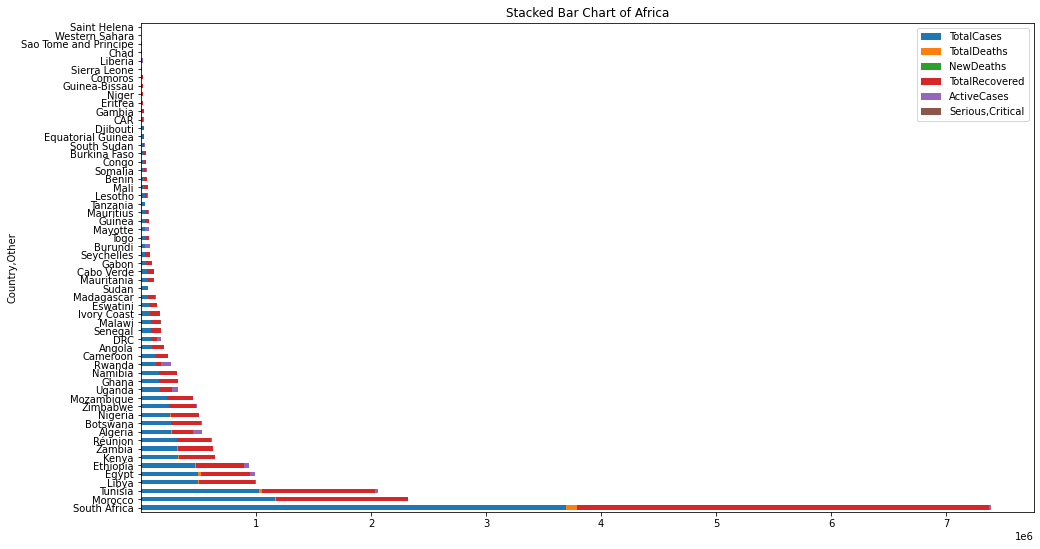

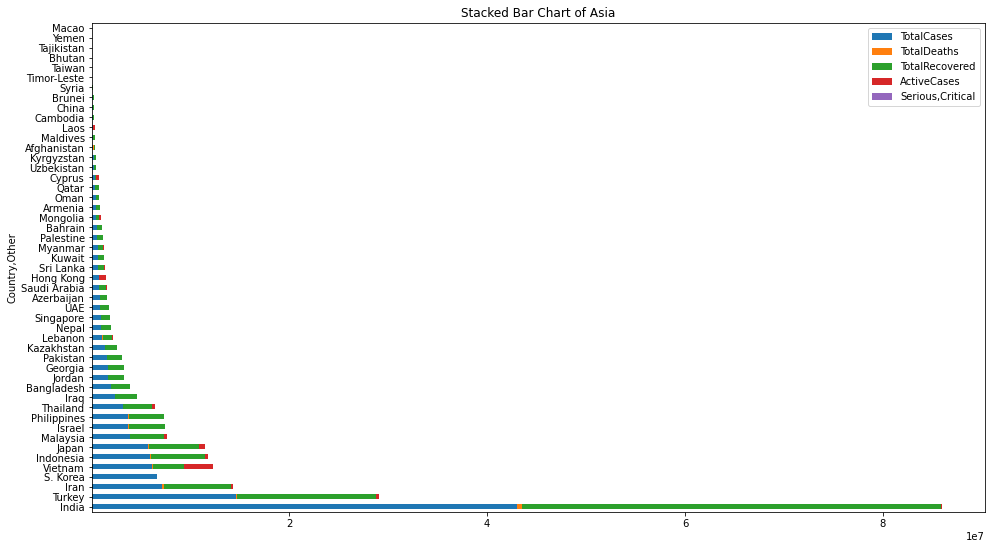

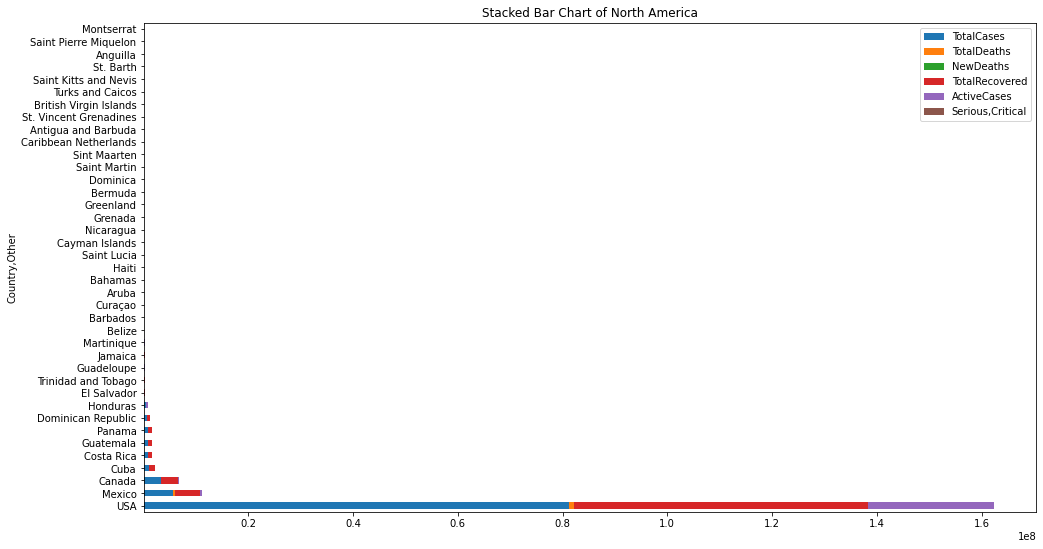

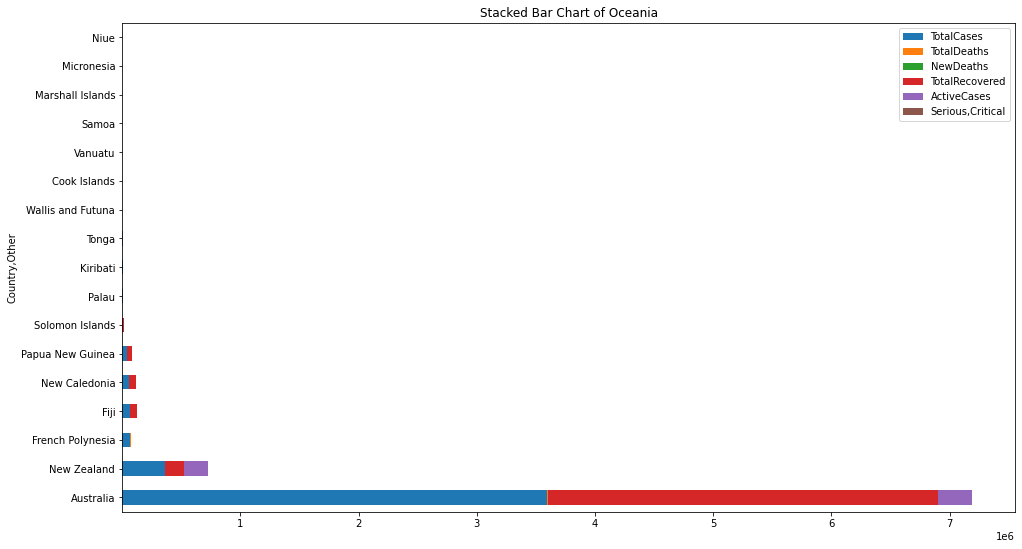

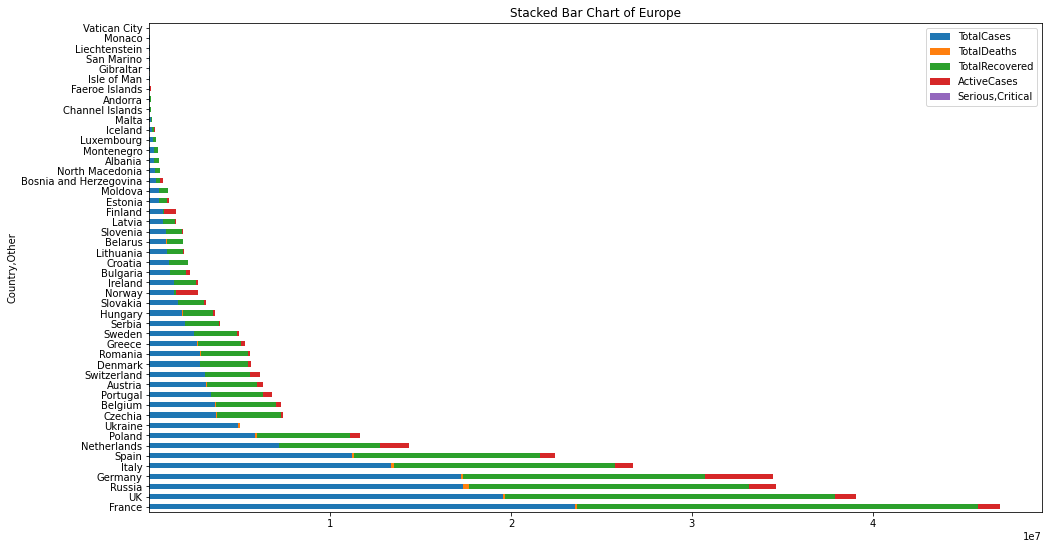

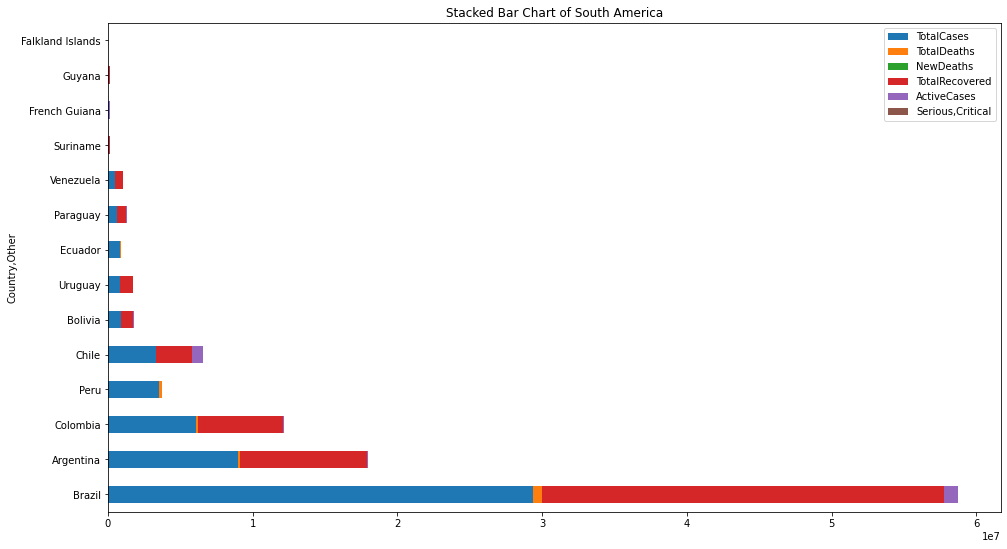

In [9]:
def compare_countries(file_name,continents):
    df = pd.read_csv(file_name,sep='\t')
    new_df = df.iloc[1:-1]
    new_df = new_df.loc[:,'Country,Other':'Serious,Critical']
    new_df.plot.barh(x='Country,Other', stacked=True,
        title='Stacked Bar Chart of '+continents, 
        figsize=(16,9))

    plt.show()
    
compare_countries('africa_12032022.csv','Africa')
compare_countries('asia_12032022.csv','Asia')
compare_countries('north_america_12032022.csv','North America')
compare_countries('oceania_12032022.csv','Oceania')
compare_countries('europe_12032022.csv','Europe')
compare_countries('south_america_12032022.csv','South America')

Hàm `compare_countries` sử dụng biểu đồ cột chồng `stacked bar chart` để so sánh số liệu giữa các quốc gia trong cùng một châu lục về một số trường dữ liệu nhất định